# Logistic regression

## Importing libraries

In [1]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

## Loading the data

In [2]:
df = pd.read_csv('../data/clean.csv')

In [3]:
df.head()

,round,value,category,clue,correct_response,air_date,is_daily_double,host_commented,is_irregular_value,is_common_category
0,1,200,SUDDENLY SUDAN,From 1899 to 1956 Sudan was controlled by Egyp...,England (Great Britain),2001-11-26,0,0,0,0
1,1,400,SUDDENLY SUDAN,In 1995 this former U.S. president oversaw a c...,Jimmy Carter,2001-11-26,0,0,0,0
2,1,600,SUDDENLY SUDAN,The Atbarah River joins this river in northern...,the Nile,2001-11-26,0,0,0,0
3,1,800,SUDDENLY SUDAN,This Sudanese city of about 1 million was foun...,Khartoum,2001-11-26,0,0,0,0
4,1,1400,SUDDENLY SUDAN,"Handling most of the country's foreign trade, ...",the Red Sea,2001-11-26,1,0,1,0


In [4]:
df.shape

(174872, 10)

## Train/test split

In [5]:
features = ['round', 'value', 'host_commented', 'is_irregular_value', 'is_common_category']

X = df[features]
y = df['is_daily_double']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## Fitting a model

In [6]:
logreg = LogisticRegression(solver='liblinear')

In [7]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
print('Train score:', logreg.score(X_train, y_train))
print('Test score:', logreg.score(X_test, y_test))
print('Baseline accuracy:', 1 - y.mean())

Train score: 0.9736416731475975
Test score: 0.9733519374170823
Baseline accuracy: 0.9479733748112905


## What was the model most likely to get wrong?

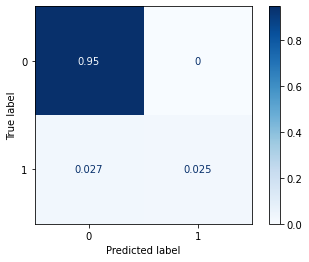

In [9]:
plot_confusion_matrix(logreg, X_test, y_test, normalize='all', cmap='Blues');

## Which clues did the model mislassify as not being daily doubles?

In [17]:
df['pred_is_daily_double'] = logreg.predict(X)

In [18]:
df[df['pred_is_daily_double'] != df['is_daily_double']]

,round,value,category,clue,correct_response,air_date,is_daily_double,host_commented,is_irregular_value,is_common_category,pred_is_daily_double
31,2,2000,CLASSICAL MUSIC,This Leoncavallo opera of 1892 has a Commedia ...,Pagliacci,2001-11-26,1,0,0,1,0
60,1,1000,THE SANDBOX,This American won 2 Pulitzer Prizes: one for h...,Carl Sandburg,2001-11-27,1,0,0,0,0
96,2,2000,SEA CREATURES,The 2 body parts the term cephalopod refers to,head & foot,2001-11-27,1,0,0,0,0
124,1,1000,YOU HIT ME IN THE FACE!,In a battle between this talk show host's nose...,Geraldo Rivera,2001-11-28,1,0,0,0,0
134,2,1000,FICTIONAL CHARACTERS,He's the Winston Groom title character who had...,"\""Forrest Gump\""",2001-11-28,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
174679,1,2000,COMPANY ADS & SLOGANS,"This bank was ""Established 1852. Re-establishe...",Wells Fargo,2019-07-23,1,0,0,0,0
174715,2,2000,STATE OF THE ART,The Crazy Horse memorial,South Dakota,2019-07-23,1,1,0,0,0
174762,2,2000,HISTORY BOOKS,"A look at great historic clashes, Phlip Sabin'...",Marathon,2019-07-24,1,0,0,0,0
174778,1,1000,TV SPINOFFS,"\""Torchwood"" was a spinoff of this British ser...",Doctor Who,2019-07-25,1,0,0,0,0


## What did our model use in making predictions?

In [10]:
coef_df = pd.DataFrame({
    'features': features,
    'coefficients': logreg.coef_[0]
})

In [11]:
coef_df

,features,coefficients
0,round,-1.828799
1,value,0.002561
2,host_commented,-0.283460
3,is_irregular_value,5.665158
4,is_common_category,0.344973
